# DATA ANALYSIS

# Import the data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/BBA_Wellbeing_Initiatives_Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and the columns of the dataset
data_info = data.info()
data_head = data.head()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 13 columns):
 #   Column                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                           --------------  ----- 
 0   Age                                                                                                                                                                              153 non-null    int64 
 1   Gender Identity                                                                                                                                                                  153 non-null    object
 2   Employment Status                                                     

(   Age Gender Identity     Employment Status  \
 0   22            Male                Intern   
 1   21          Female              Fulltime   
 2   22            Male  Working and studying   
 3   22            Male  Working and studying   
 4   22            Male               Student   
 
   Which industry are you in or do you want to enter?  \
 0                                            Finance   
 1                                         Consulting   
 2                                            Fashion   
 3                                            Fashion   
 4                                       Hospitality    
 
    Overall, how satisfied are you with your current job? (1-5 scale, 1 being very dissatisfied and 5 being very satisfied)  \
 0                                                  4                                                                         
 1                                                  5                                                     

# EDA

## Analyze the data structure

In [ ]:
# Display actual column names to identify and correct any mismatch in column references
data.columns

Index(['Age', 'Gender Identity', 'Employment Status',
       'Which industry are you in or do you want to enter?',
       'Overall, how satisfied are you with your current job? (1-5 scale, 1 being very dissatisfied and 5 being very satisfied)',
       'What factors contribute to your job satisfaction? (Select all that apply)',
       'Do you feel your organization is implementing employee retention strategies?',
       'Is your organization currently offering any wellbeing initiatives?',
       'If yes, which of the following wellbeing initiatives are offered? (Select all that apply)',
       'On a scale of 1 to 5, how effective do you find these initiatives in supporting your overall wellbeing? (1-5 scale, 1 being not effective at all and 5 being very effective)',
       'How likely are you to continue working for your current employer for the next two years? (1-5 scale, 1 being very unlikely and 5 being very likely)',
       'To what extent do you believe that wellbeing initiatives i

## Missing values

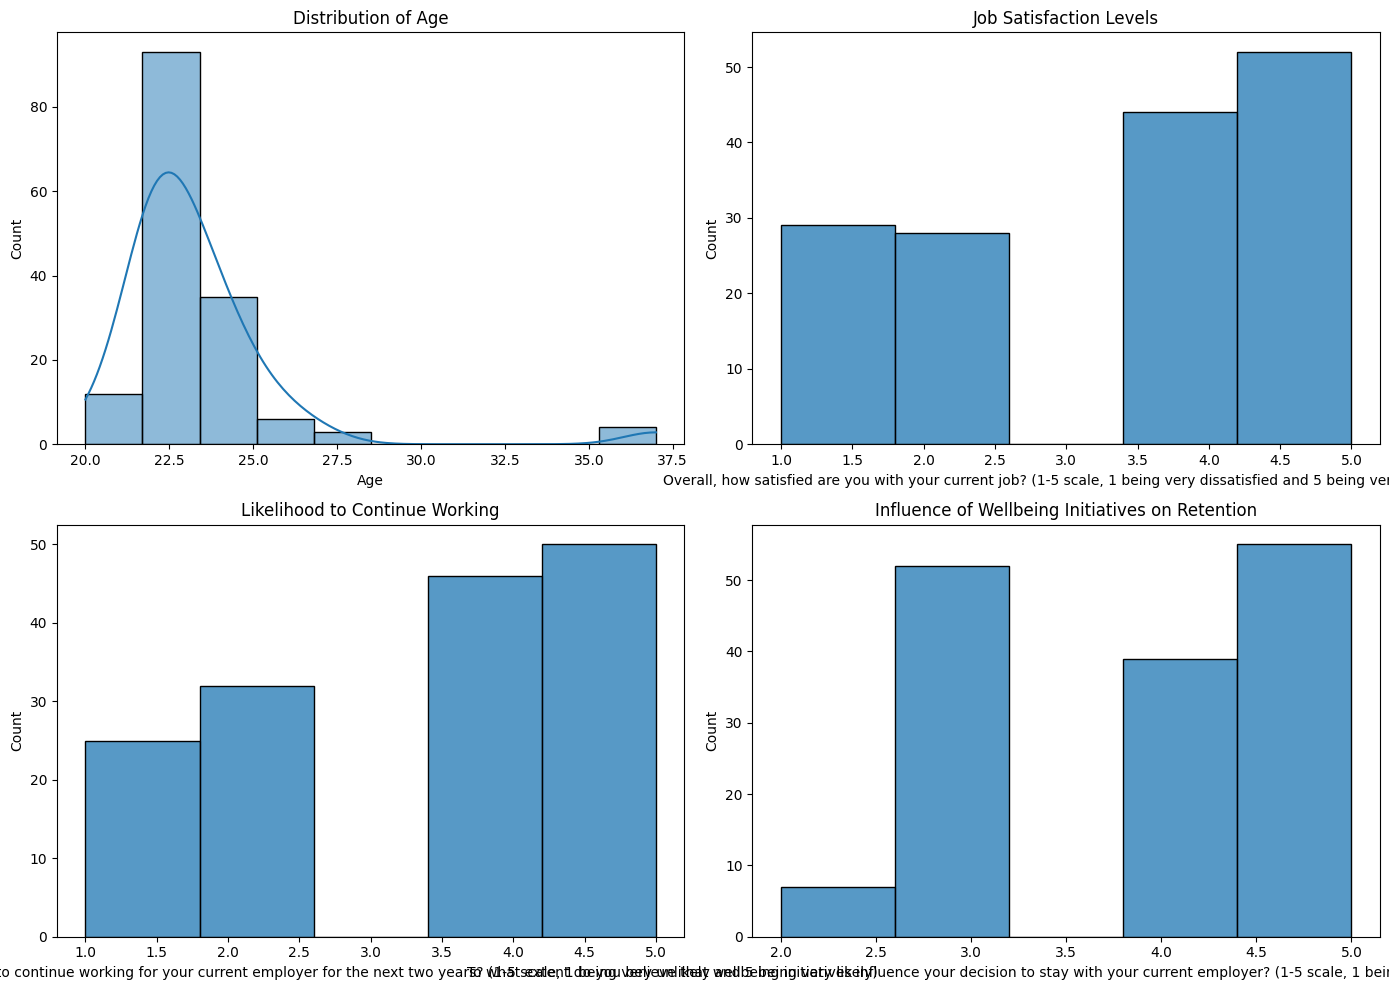

(              Age  \
 count  153.000000   
 mean    23.320261   
 std      2.637417   
 min     20.000000   
 25%     22.000000   
 50%     23.000000   
 75%     24.000000   
 max     37.000000   
 
        Overall, how satisfied are you with your current job? (1-5 scale, 1 being very dissatisfied and 5 being very satisfied)  \
 count                                         153.000000                                                                         
 mean                                            3.405229                                                                         
 std                                             1.562041                                                                         
 min                                             1.000000                                                                         
 25%                                             2.000000                                                                         
 50%          

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
summary_statistics = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Plot distributions of key numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
sns.histplot(data['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
sns.histplot(data['Overall, how satisfied are you with your current job? (1-5 scale, 1 being very dissatisfied and 5 being very satisfied)'], bins=5, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Job Satisfaction Levels')
sns.histplot(data['How likely are you to continue working for your current employer for the next two years? (1-5 scale, 1 being very unlikely and 5 being very likely)'], bins=5, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Likelihood to Continue Working')
sns.histplot(data['To what extent do you believe that wellbeing initiatives influence your decision to stay with your current employer? (1-5 scale, 1 being not at all and 5 being a great extent)'], bins=5, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Influence of Wellbeing Initiatives on Retention')

plt.tight_layout()
plt.show()

summary_statistics, missing_values


# Analysis


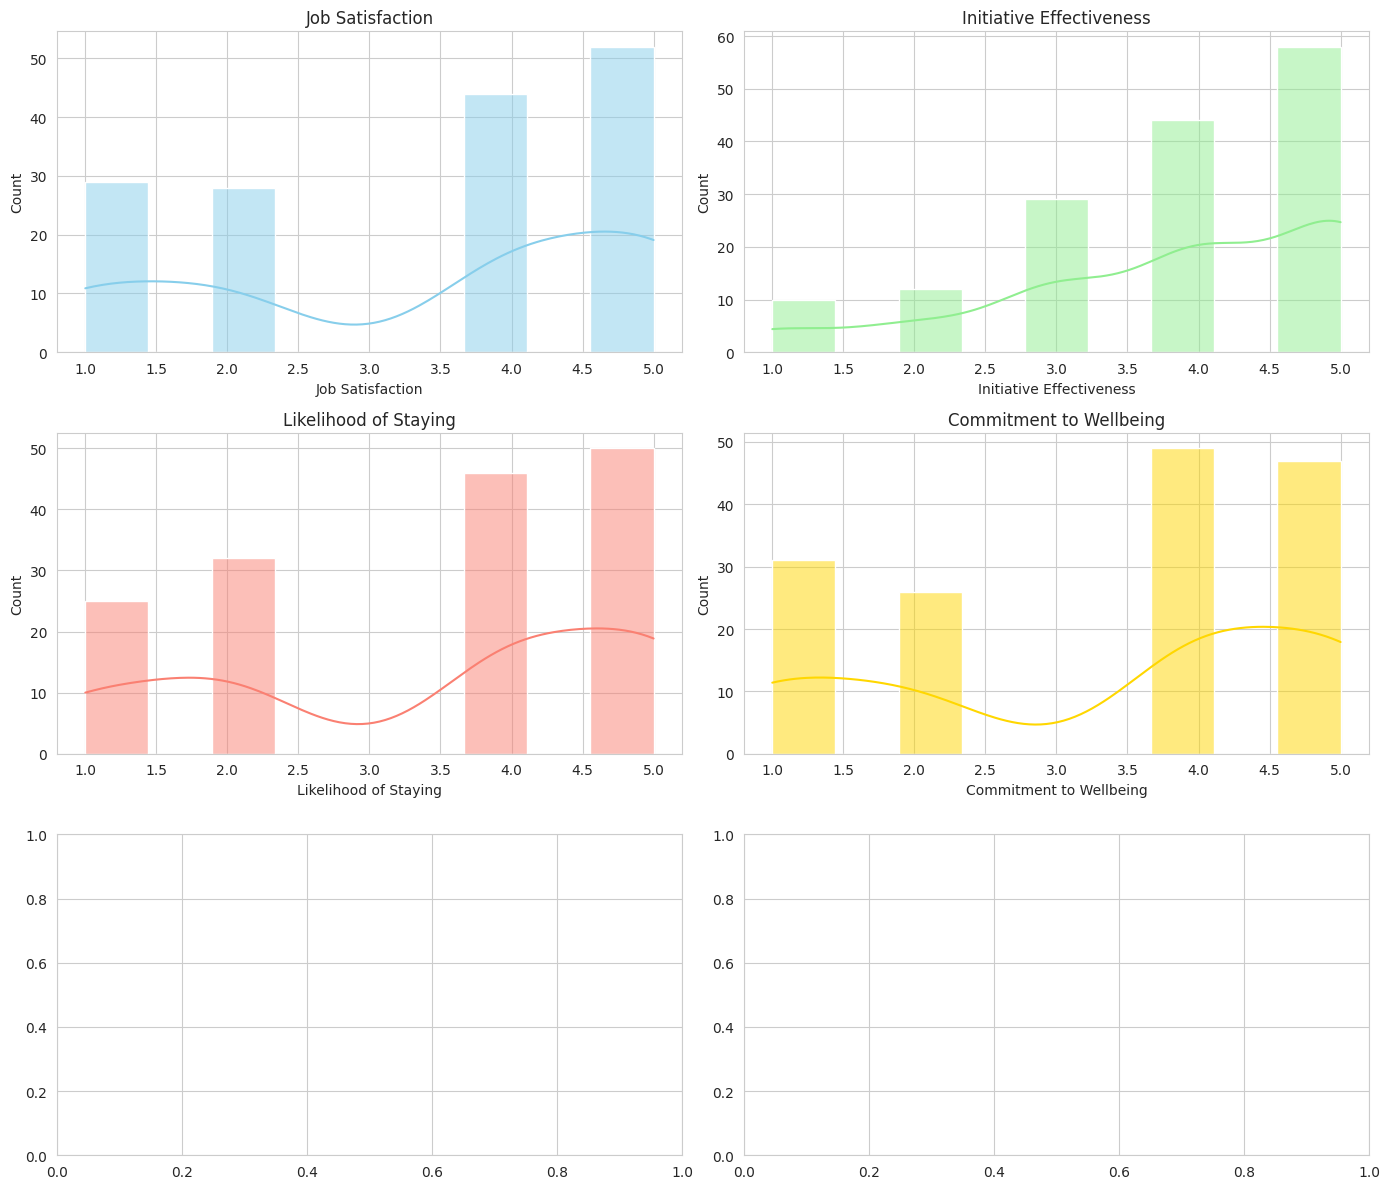

                          Job Satisfaction  Initiative Effectiveness  \
Job Satisfaction                  1.000000                  0.664241   
Initiative Effectiveness          0.664241                  1.000000   
Likelihood of Staying             0.903432                  0.633479   
Commitment to Wellbeing           0.890704                  0.667026   

                          Likelihood of Staying  Commitment to Wellbeing  
Job Satisfaction                       0.903432                 0.890704  
Initiative Effectiveness               0.633479                 0.667026  
Likelihood of Staying                  1.000000                 0.891000  
Commitment to Wellbeing                0.891000                 1.000000  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



survey_columns2 = [
    "Overall, how satisfied are you with your current job? (1-5 scale, 1 being very dissatisfied and 5 being very satisfied)",
    "On a scale of 1 to 5, how effective do you find these initiatives in supporting your overall wellbeing? (1-5 scale, 1 being not effective at all and 5 being very effective)",
    "How likely are you to continue working for your current employer for the next two years? (1-5 scale, 1 being very unlikely and 5 being very likely)",
    "To what extent do you agree with the following statement: My organization’s commitment to employee wellbeing is reflective of its ethical and social responsibilities."
]

# Define new short names for the columns for ease of reference in the correlation matrix
new_column_names2 = [
    "Job Satisfaction",
    "Initiative Effectiveness",
    "Likelihood of Staying",
    "Commitment to Wellbeing"
]

# Rename the columns in the data frame
data_renamed2 = data[survey_columns2].rename(columns=dict(zip(survey_columns2, new_column_names2)))

# Creating histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten the array for easy iteration
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']

for col, ax, color in zip(new_column_names2, axes, colors):
    sns.histplot(data_renamed2[col], kde=True, ax=ax, color=color)
    ax.set_title(col)

# Remove the last empty subplot (if the number of variables is odd)
if len(new_column_names2) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

# Now, let's calculate the correlation matrix for the numerical variables
correlation_matrix2 = data_renamed2.corr()

print(correlation_matrix2)


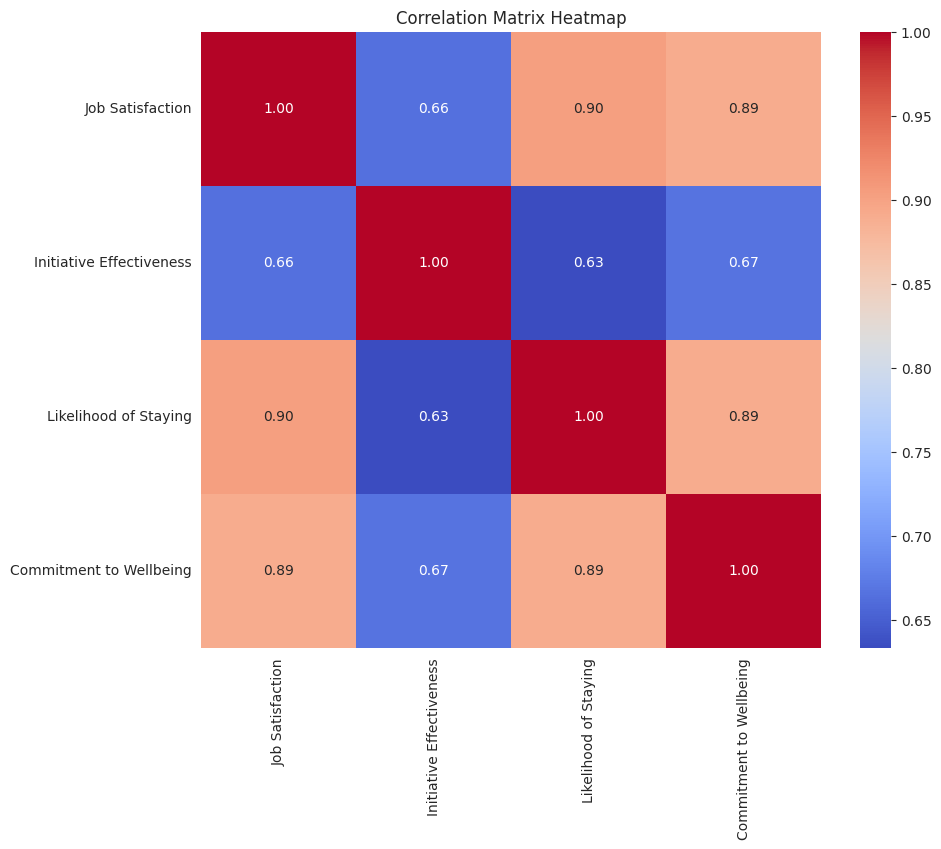

(       Overall, how satisfied are you with your current job? (1-5 scale, 1 being very dissatisfied and 5 being very satisfied)  \
 count                                         153.000000                                                                         
 mean                                            3.405229                                                                         
 std                                             1.562041                                                                         
 min                                             1.000000                                                                         
 25%                                             2.000000                                                                         
 50%                                             4.000000                                                                         
 75%                                             5.000000                          

In [ ]:
# Let's start by performing a basic analysis of the dataset.
# This will include looking at descriptive statistics for the survey questions and visualizing correlations.

# Descriptive statistics for the survey questions
descriptive_stats2 = data[survey_columns2].describe()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

descriptive_stats2, correlation_matrix2